Setting up libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(np.__version__)
print(pd.__version__)

1.21.6
1.3.5


Load the dataset

In [ ]:
data_df = pd.read_csv('/content/data.csv')
validation_df = pd.read_csv('/content/validation.csv')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   unique_id                    70000 non-null  int64  
 1   exposure                     70000 non-null  float64
 2   nEvent                       70000 non-null  int64  
 3   numberDailyCalories          70000 non-null  int64  
 4   numberWeeklyBurgers          32590 non-null  float64
 5   numberWeeklySodas            32590 non-null  float64
 6   numberYearsWithoutJunkFood   70000 non-null  int64  
 7   numberYearsWithoutTransFat   70000 non-null  int64  
 8   numberMonthlyCucumbers       70000 non-null  int64  
 9   diet                         70000 non-null  object 
 10  keto                         70000 non-null  int64  
 11  eatSpicy                     70000 non-null  int64  
 12  practicesSport               70000 non-null  int64  
 13  numberWeeklyHead

Categorical features:
- diet
- MachineryVar1
- MachineryVar2
- MachineryVar3
- MachineryVar4

In [ ]:
print(data_df.diet.unique())
print(data_df.MachineryVar1.unique())
print(data_df.MachineryVar2.unique())
print(data_df.MachineryVar3.unique())
print(data_df.MachineryVar4.unique())

['Vegetarian' 'Omnivore' 'Vegan' 'Carnivore' 'Frugivore' 'Pescatarian']
['A' 'C' 'I' 'B' 'J' 'D' 'G' 'E' 'F' 'H']
['E' 'A' 'F' 'J' 'D' 'B' 'G' 'C' 'H' 'I']
['B' 'A' 'D' 'C']
['A' 'B' 'C']


In [ ]:
data_df.isna().sum()

unique_id                          0
exposure                           0
nEvent                             0
numberDailyCalories                0
numberWeeklyBurgers            37410
numberWeeklySodas              37410
numberYearsWithoutJunkFood         0
numberYearsWithoutTransFat         0
numberMonthlyCucumbers             0
diet                               0
keto                               0
eatSpicy                           0
practicesSport                     0
numberWeeklyHeadaches              0
numberDaysMeditatingPerYear     7176
MachineryVar1                      0
MachineryVar2                      0
MachineryVar3                      0
MachineryVar4                      0
NumberEmployees                    0
TireInches                      4771
ClosestFireStation                 0
ValueMachinery                  1217
InspectedLast5Yrs                  0
NumberCylinders                30483
deductible                         0
dtype: int64

Data cleaning strategies:
- Drop the features has large number of missing values (>10,000)
- Fill NA with mean values


In [ ]:
data_df.drop(labels='numberWeeklyBurgers',axis=1,inplace=True)
data_df.drop('numberWeeklySodas', axis=1, inplace=True)
data_df.drop('NumberCylinders', axis=1, inplace=True)

In [ ]:
data_df.numberDaysMeditatingPerYear.fillna(np.mean(data_df.numberDaysMeditatingPerYear[data_df.numberDaysMeditatingPerYear.isna() == False]),
                                           inplace=True)
data_df.TireInches.fillna(np.mean(data_df.TireInches[data_df.TireInches.isna() == False]),
                                           inplace=True)
data_df.ValueMachinery.fillna(np.mean(data_df.ValueMachinery[data_df.ValueMachinery.isna() == False]),
                                           inplace=True)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   unique_id                    70000 non-null  int64  
 1   exposure                     70000 non-null  float64
 2   nEvent                       70000 non-null  int64  
 3   numberDailyCalories          70000 non-null  int64  
 4   numberYearsWithoutJunkFood   70000 non-null  int64  
 5   numberYearsWithoutTransFat   70000 non-null  int64  
 6   numberMonthlyCucumbers       70000 non-null  int64  
 7   diet                         70000 non-null  object 
 8   keto                         70000 non-null  int64  
 9   eatSpicy                     70000 non-null  int64  
 10  practicesSport               70000 non-null  int64  
 11  numberWeeklyHeadaches        70000 non-null  int64  
 12  numberDaysMeditatingPerYear  70000 non-null  float64
 13  MachineryVar1   

Balance the labels

In [ ]:
data_df.nEvent.value_counts()

0    67593
1     2407
Name: nEvent, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


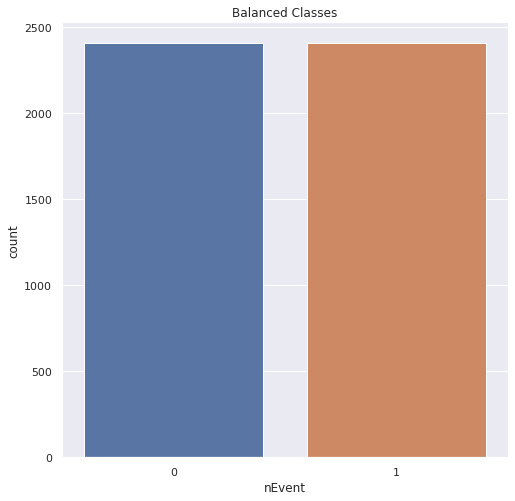

In [ ]:
#Undersampling
# Shuffle the Dataset.
shuffled_df = data_df.sample(frac=1,random_state=4)

# Put all the drought class in a separate dataset.
drought_df = shuffled_df.loc[shuffled_df['nEvent'] == 1]

#Randomly select 2408 observations from the non-drought (majority class)
non_drought_df = shuffled_df.loc[shuffled_df['nEvent'] == 0].sample(n=2408,random_state=42)

# Concatenate both dataframes again
balanced_df = pd.concat([drought_df, non_drought_df])

#plot the dataset after the undersampling
plt.figure( figsize=(8, 8))
sns.countplot('nEvent', data=balanced_df)
plt.title('Balanced Classes')
plt.show()

Correlation heat mat - check "dependence" between predictor variables

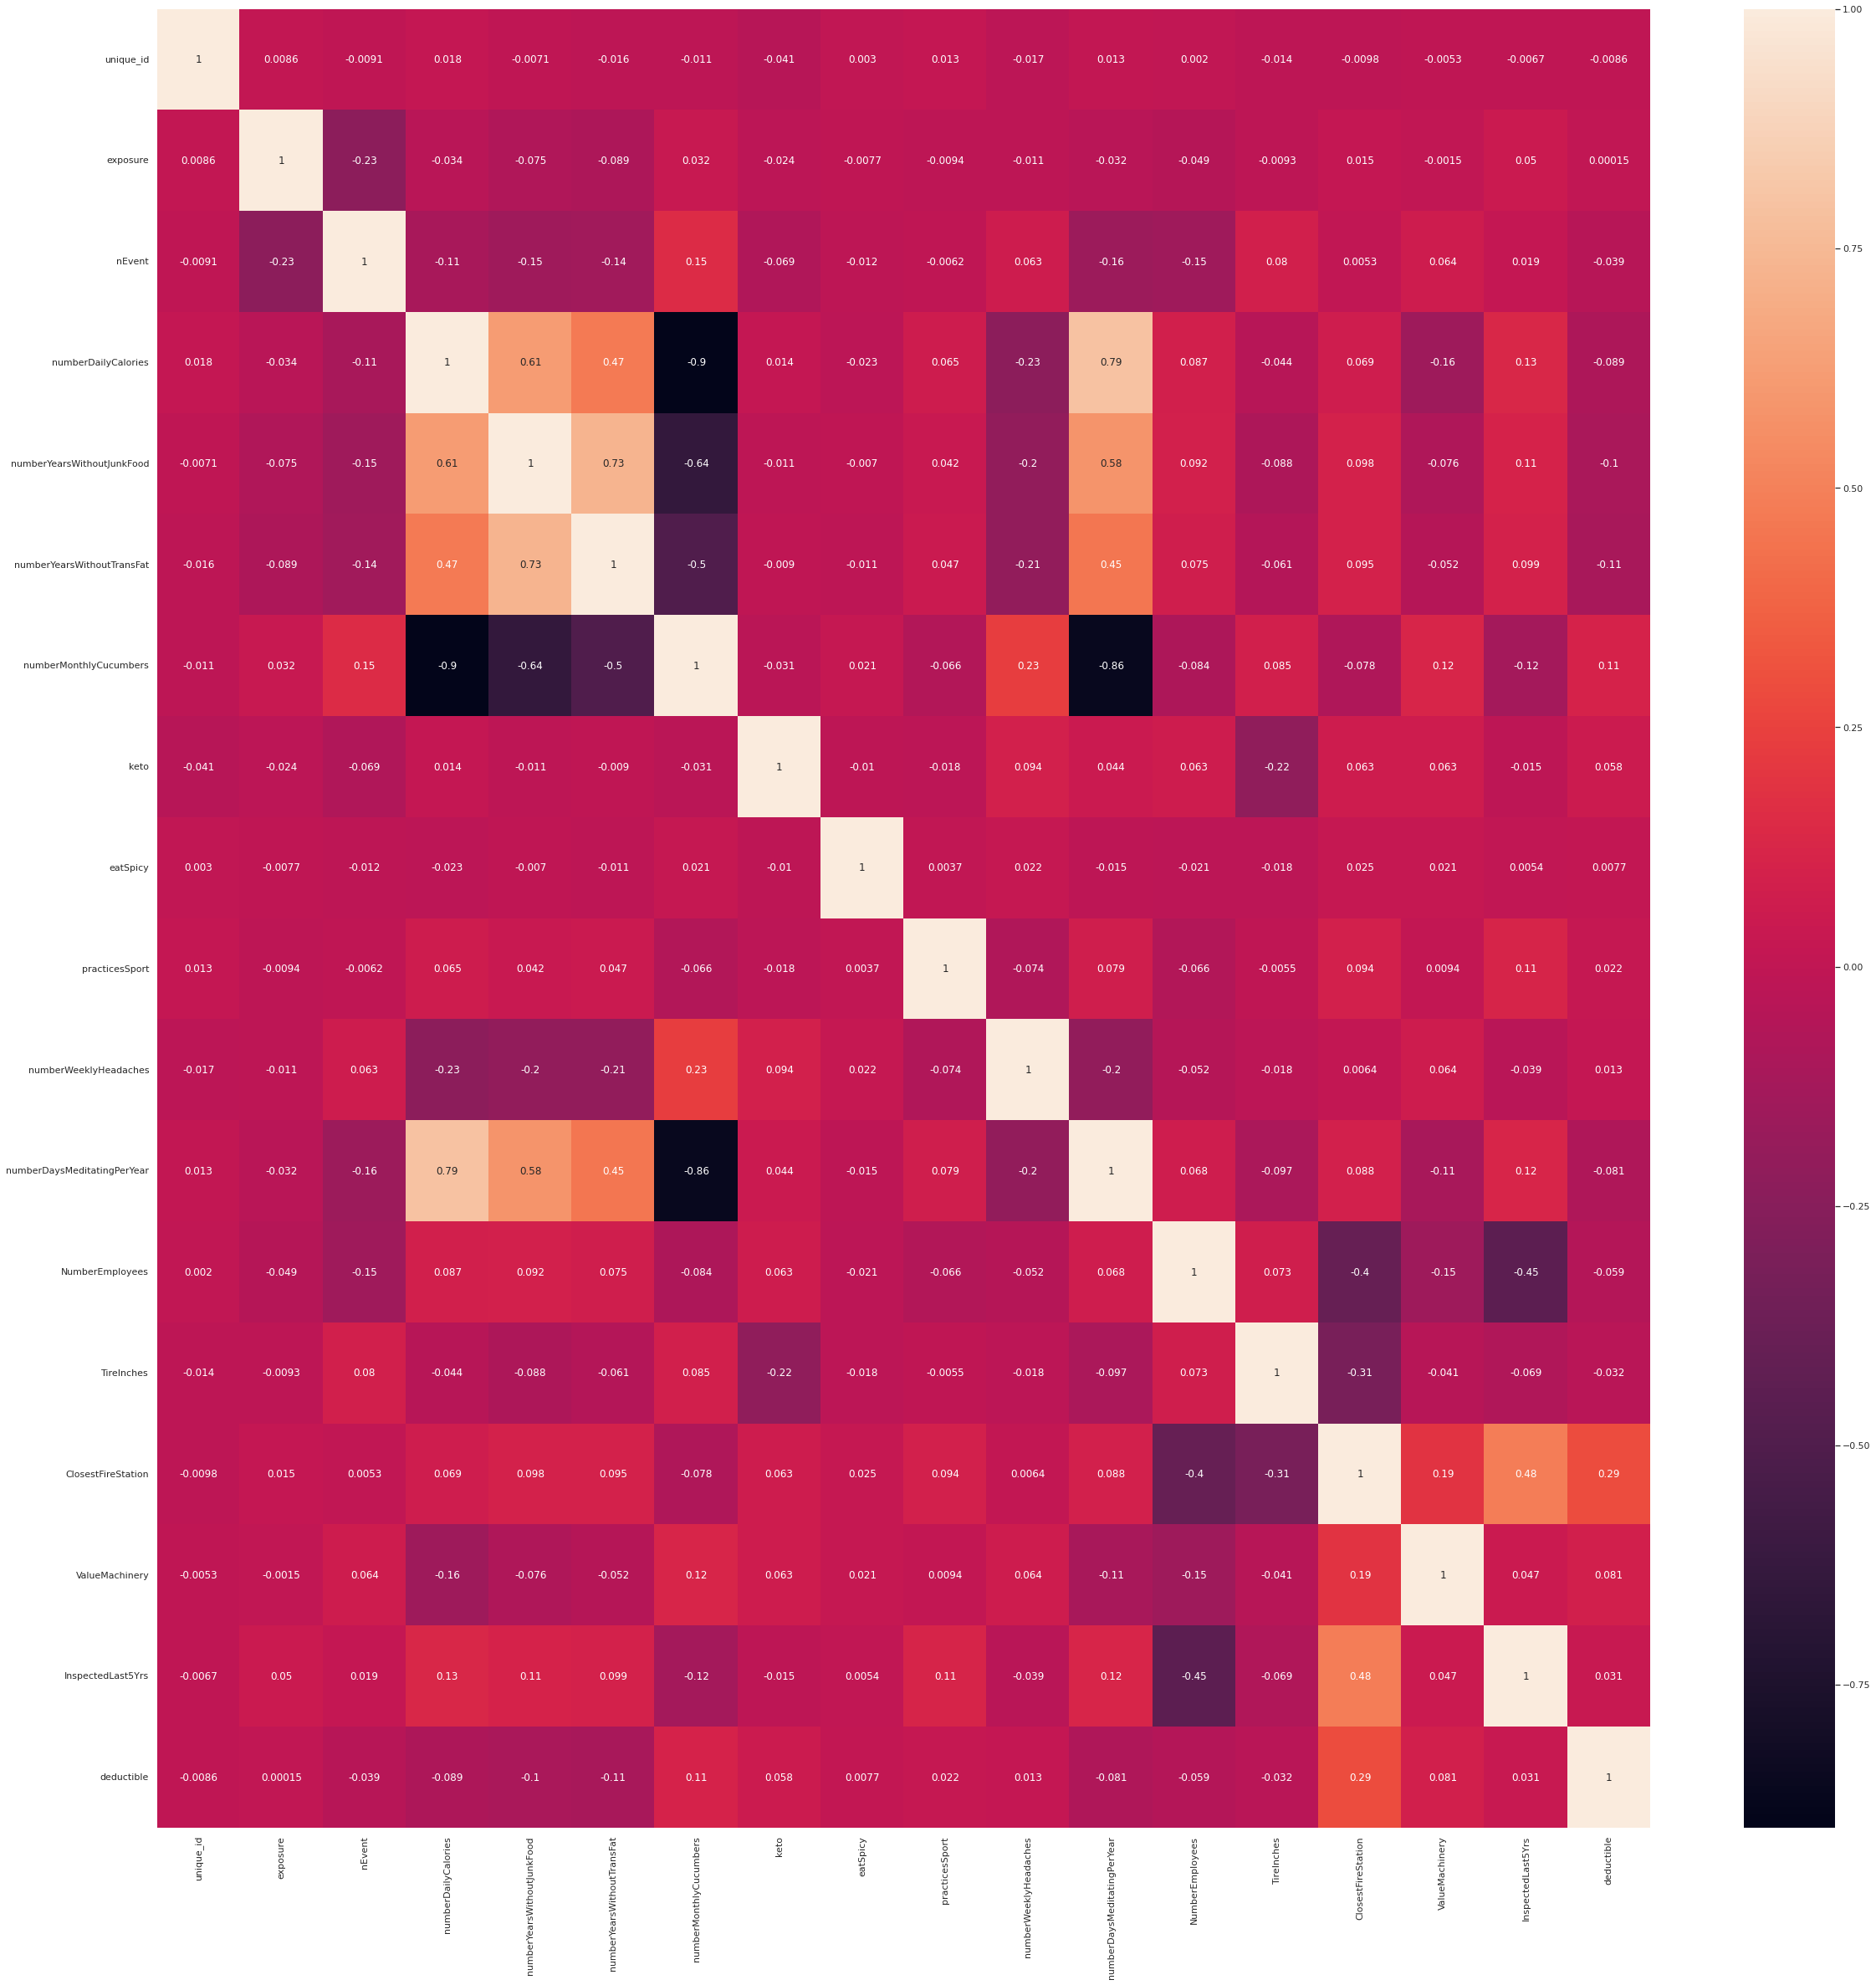

In [ ]:
corrMatrix = balanced_df.corr()
sns.set()
plt.figure(figsize=(40,40))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Multiply interaction variables

In [ ]:
inter_numberDailyCalories = balanced_df.numberDailyCalories * balanced_df.numberMonthlyCucumbers * balanced_df.numberDaysMeditatingPerYear
balanced_df['inter_numberDailyCalories'] = inter_numberDailyCalories

balanced_df.drop(['numberMonthlyCucumbers','numberDailyCalories','numberDaysMeditatingPerYear','numberYearsWithoutJunkFood'],axis=1,inplace=True)

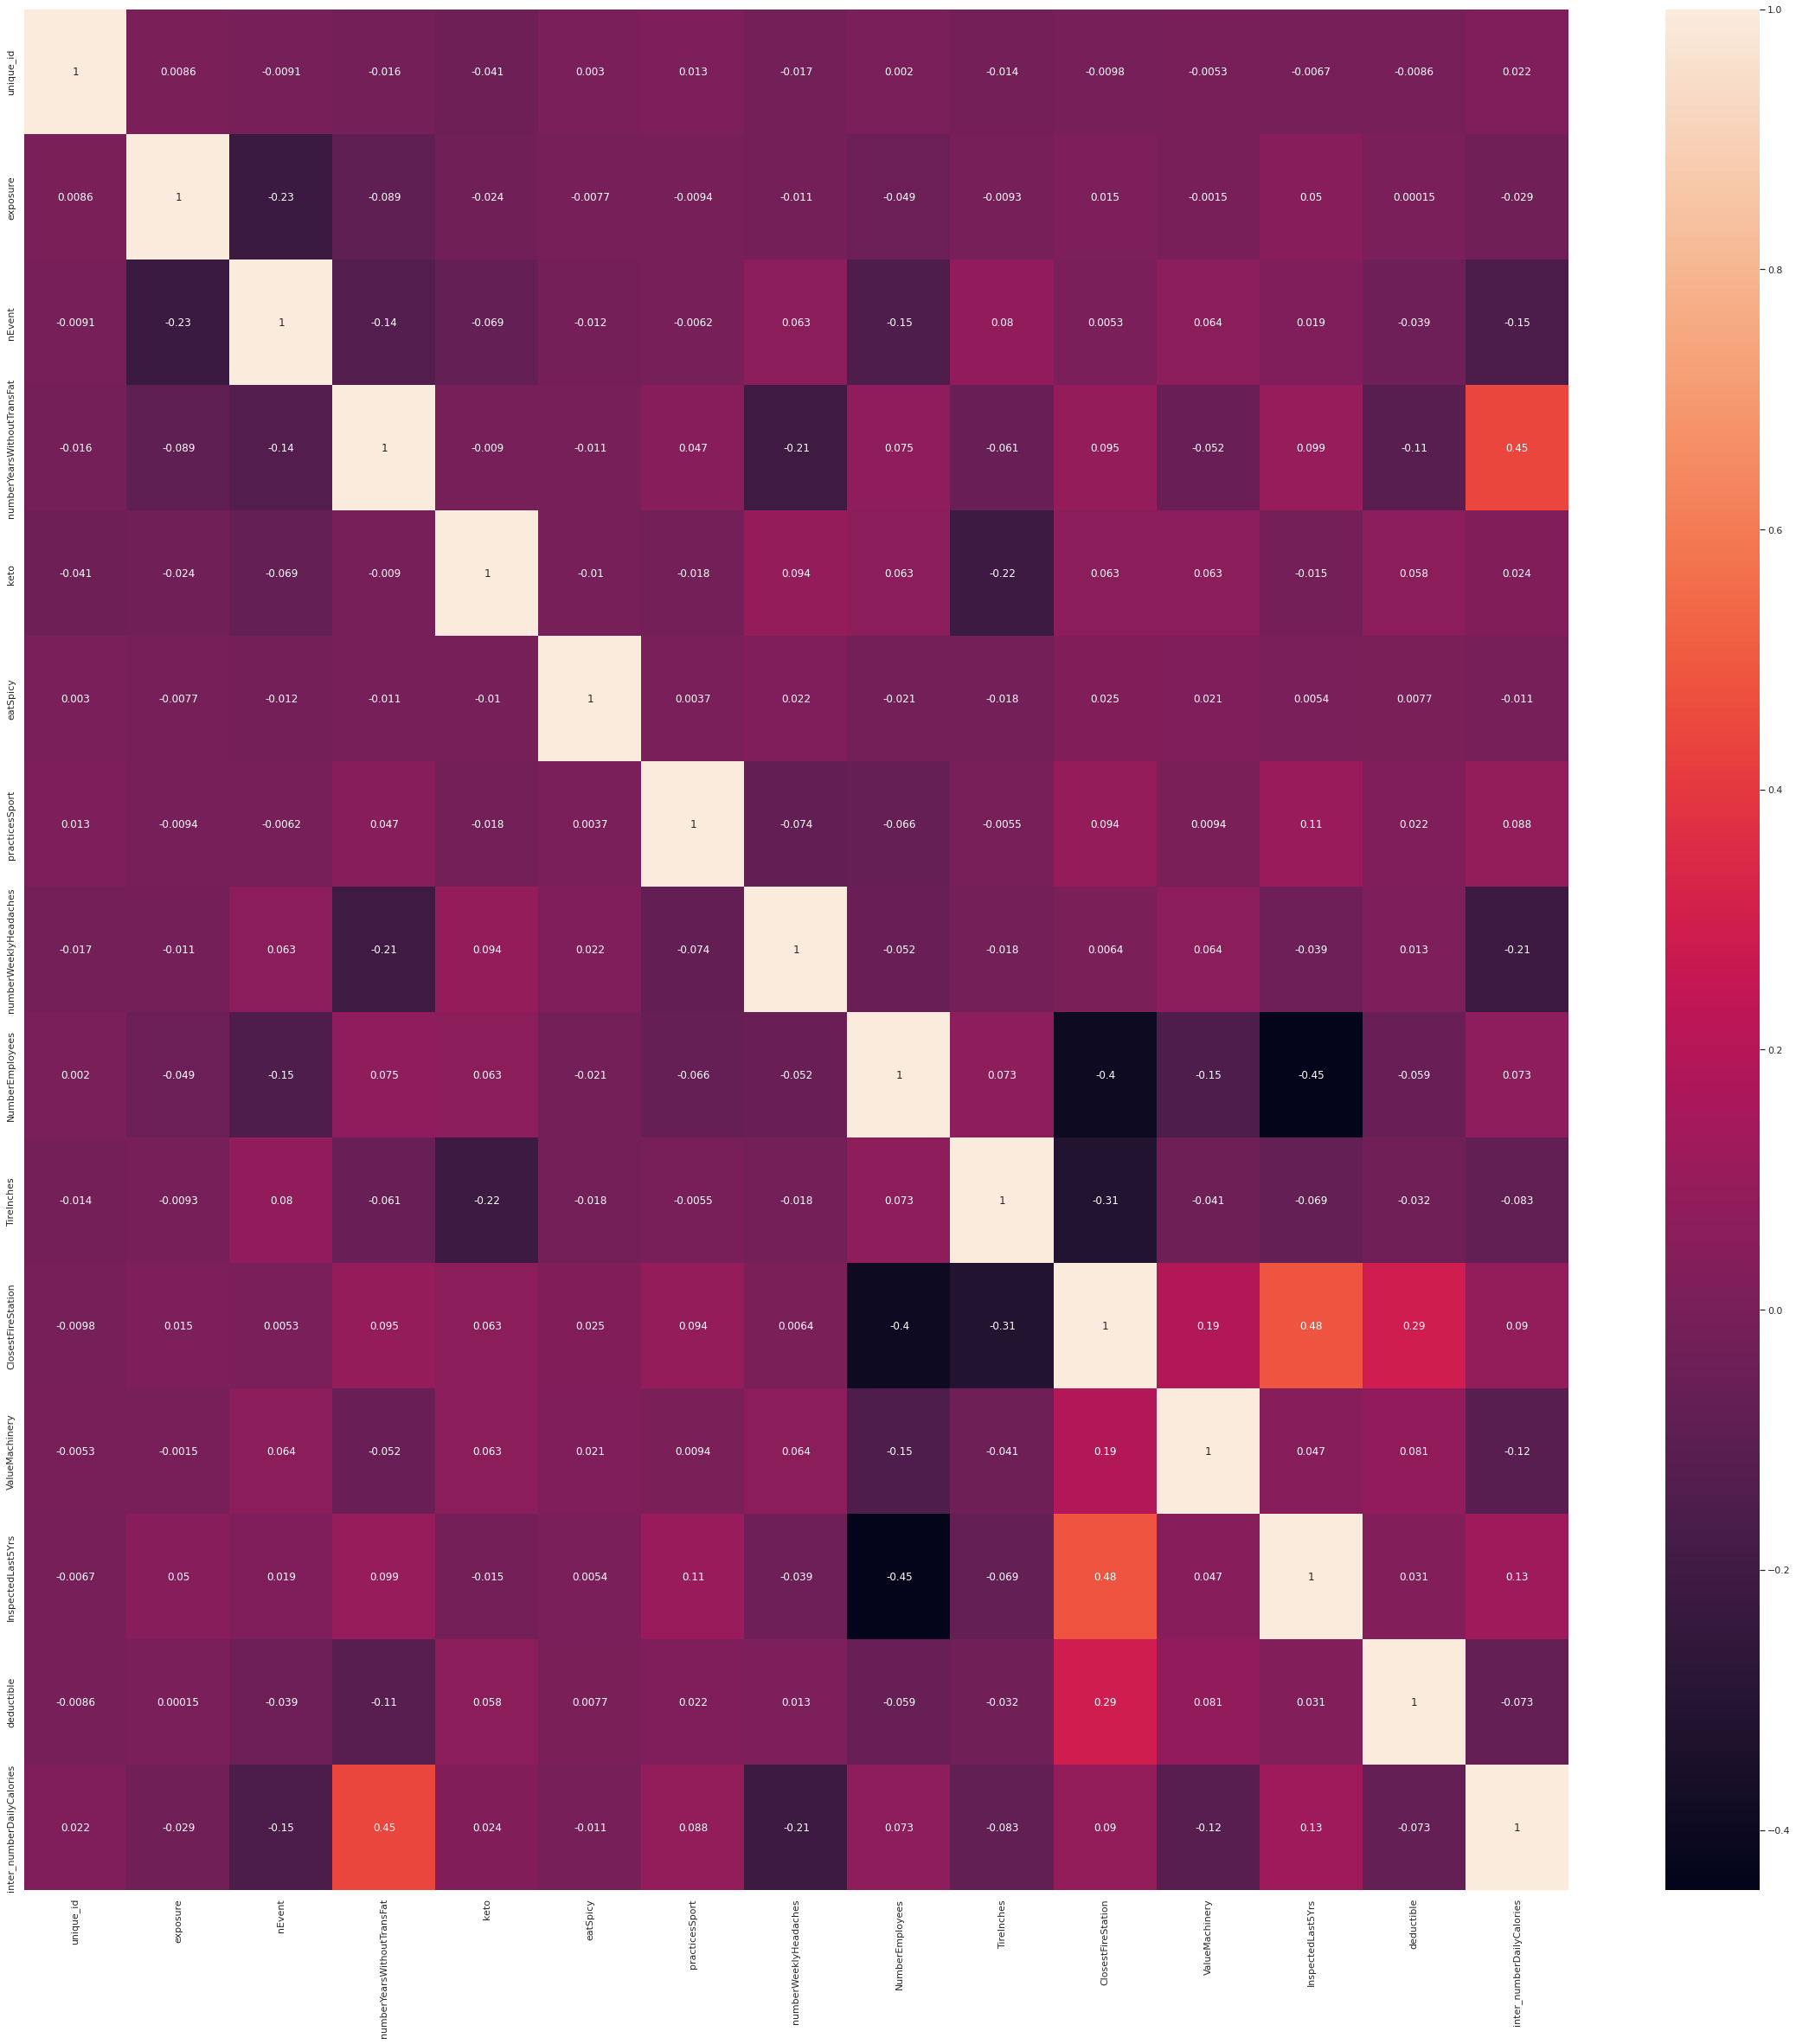

In [ ]:
corrMatrix = balanced_df.corr()
sns.set()
plt.figure(figsize=(40,40))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Drop features that have high p-values from linear regression

In [ ]:
X = balanced_df.drop(['unique_id','nEvent','diet','MachineryVar1','MachineryVar2','MachineryVar3','MachineryVar4',
                      'eatSpicy','practicesSport','numberWeeklyHeadaches','ValueMachinery','InspectedLast5Yrs'],axis=1)
y = balanced_df.nEvent

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 55566 to 28927
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   exposure                    4815 non-null   float64
 1   numberYearsWithoutTransFat  4815 non-null   int64  
 2   keto                        4815 non-null   int64  
 3   NumberEmployees             4815 non-null   int64  
 4   TireInches                  4815 non-null   float64
 5   ClosestFireStation          4815 non-null   int64  
 6   deductible                  4815 non-null   float64
 7   inter_numberDailyCalories   4815 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 467.6 KB


In [ ]:
y

55566    1
49565    1
69703    1
10568    1
3691     1
        ..
32848    0
67017    0
44364    0
4229     0
28927    0
Name: nEvent, Length: 4815, dtype: int64

In [ ]:
# Split training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Modify validation data

In [ ]:
# keep the ID for the final spreadsheet
validation_unique_id = validation_df.unique_id

In [ ]:
# Multiply the interaction varaibles
inter_numberDailyCalories = validation_df.numberDailyCalories * validation_df.numberMonthlyCucumbers * validation_df.numberDaysMeditatingPerYear
validation_df['inter_numberDailyCalories'] = inter_numberDailyCalories

In [ ]:
# use the same columns as the training dataset
validation_df = validation_df[list(X.columns)]

Fill missing values

In [ ]:
validation_df.isna().sum()

exposure                         0
numberYearsWithoutTransFat       0
keto                             0
NumberEmployees                  0
TireInches                    2004
ClosestFireStation               0
deductible                       0
inter_numberDailyCalories     3001
dtype: int64

In [ ]:
# Fill missing values by simple imputation (means)
validation_df.TireInches.fillna(np.mean(validation_df.TireInches[validation_df.TireInches.isna() == False]), inplace=True)
validation_df.inter_numberDailyCalories.fillna(np.mean(validation_df.inter_numberDailyCalories[validation_df.inter_numberDailyCalories.isna() == False]),
                                           inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Check the data types of each column

In [ ]:
validation_df.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   exposure                    30000 non-null  bool 
 1   numberYearsWithoutTransFat  30000 non-null  bool 
 2   keto                        30000 non-null  bool 
 3   NumberEmployees             30000 non-null  bool 
 4   TireInches                  30000 non-null  bool 
 5   ClosestFireStation          30000 non-null  bool 
 6   deductible                  30000 non-null  bool 
 7   inter_numberDailyCalories   30000 non-null  bool 
dtypes: bool(8)
memory usage: 234.5 KB


In [ ]:
for column in list(validation_df.columns):
  validation_df[column] = validation_df[column].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   exposure                    30000 non-null  float64
 1   numberYearsWithoutTransFat  30000 non-null  float64
 2   keto                        30000 non-null  float64
 3   NumberEmployees             30000 non-null  float64
 4   TireInches                  30000 non-null  float64
 5   ClosestFireStation          30000 non-null  float64
 6   deductible                  30000 non-null  float64
 7   inter_numberDailyCalories   30000 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
reg_log = LogisticRegression()
reg_log.fit(X_train,y_train)
print('Training accuracy {:.4f}'.format(reg_log.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(reg_log.score(X_test,y_test)))
print('f1 score', f1_score(y_test, reg_log.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, reg_log.predict(X_test)))

Training accuracy 0.5154
Testing accuracy 0.5073
f1 score [0.66852886 0.04043127]
Confusion matrix
 [[718   6]
 [706  15]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier()
clf_rand.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(clf_rand.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(clf_rand.score(X_test,y_test)))
print('f1 score', f1_score(y_test, clf_rand.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, clf_rand.predict(X_test)))

Training accuracy 1.0000
Testing accuracy 0.6941
f1 score [0.68017366 0.70689655]
Confusion matrix
 [[470 254]
 [188 533]]


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier()
clf_dec.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(clf_dec.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(clf_dec.score(X_test,y_test)))
print('f1 score', f1_score(y_test, clf_dec.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, clf_dec.predict(X_test)))

Training accuracy 1.0000
Testing accuracy 0.6242
f1 score [0.62782728 0.62054507]
Confusion matrix
 [[458 266]
 [277 444]]


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(clf_svm.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(clf_svm.score(X_test,y_test)))
print('f1 score', f1_score(y_test, clf_svm.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, clf_svm.predict(X_test)))

Training accuracy 0.5861
Testing accuracy 0.5841
f1 score [0.64667842 0.49453322]
Confusion matrix
 [[550 174]
 [427 294]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(clf_gnb.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(clf_gnb.score(X_test,y_test)))
print('f1 score', f1_score(y_test, clf_gnb.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, clf_gnb.predict(X_test)))

Training accuracy 0.5306
Testing accuracy 0.5377
f1 score [0.3359841  0.64543524]
Confusion matrix
 [[169 555]
 [113 608]]


K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(clf_knn.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(clf_knn.score(X_test,y_test)))
print('f1 score', f1_score(y_test, clf_knn.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, clf_knn.predict(X_test)))

Training accuracy 0.7300
Testing accuracy 0.5945
f1 score [0.60985353 0.5778098 ]
Confusion matrix
 [[458 266]
 [320 401]]


Light Gradient Boosting Machine

In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgb.fit(X_train,y_train)
print('Training accuracy {:.4f}'.format(model_lgb.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model_lgb.score(X_test,y_test)))
print('f1 score', f1_score(y_test, model_lgb.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, model_lgb.predict(X_test)))

Training accuracy 0.8760
Testing accuracy 0.6948
f1 score [0.68020305 0.7081403 ]
Confusion matrix
 [[469 255]
 [186 535]]


In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(model_xgb.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model_xgb.score(X_test,y_test)))
print('f1 score', f1_score(y_test, model_xgb.predict(X_test), average=None))
print('Confusion matrix\n', confusion_matrix(y_test, model_xgb.predict(X_test)))

Training accuracy 0.7576
Testing accuracy 0.7135
f1 score [0.68636364 0.73630573]
Confusion matrix
 [[453 271]
 [143 578]]


eXtreme Gradient Boosting (XGB) Classifier has performed better than the other models in our test data. It showed a testing accuracy of around 71%.

Creat the final prediction dataframe

In [ ]:
prediction = model_xgb.predict_proba(validation_df)[:,1]
data = {
    'ID':list(validation_unique_id),
    'Prediction':list(prediction)
}
final_df = pd.DataFrame(data)
final_df

,ID,Prediction
0,14800,0.526430
1,278323,0.123494
2,250032,0.174512
3,64646,0.520827
4,106064,0.787366
...,...,...
29995,62939,0.689553
29996,357914,0.081874
29997,381410,0.520218
29998,346498,0.276852


In [ ]:
# final_df.to_csv('validation_data_with_prediction.csv', index=False)